In [1]:


import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare', 'Survived'])

In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [7]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/var/folders/vv/9zrsbm4x2mzb44zn6t_6r9xm0000gn/T/ipykernel_2096/2888751792.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


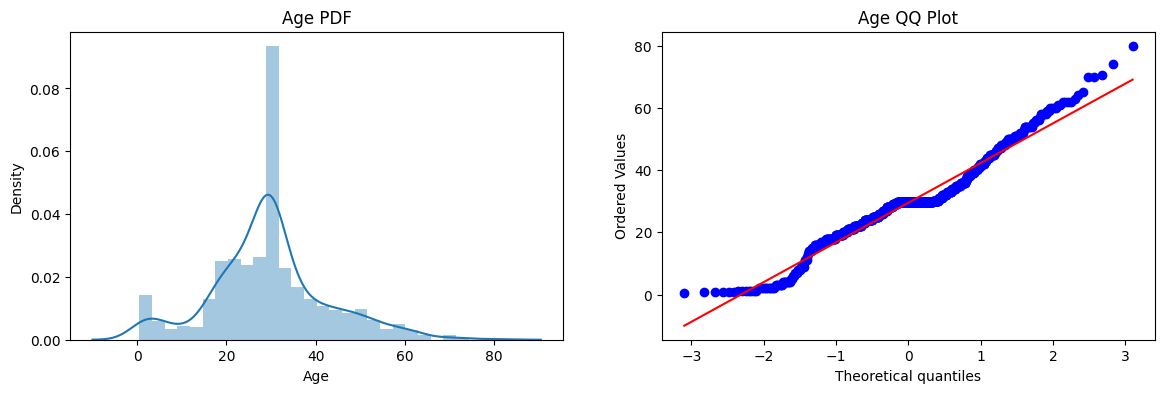

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

/var/folders/vv/9zrsbm4x2mzb44zn6t_6r9xm0000gn/T/ipykernel_2096/3252076720.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


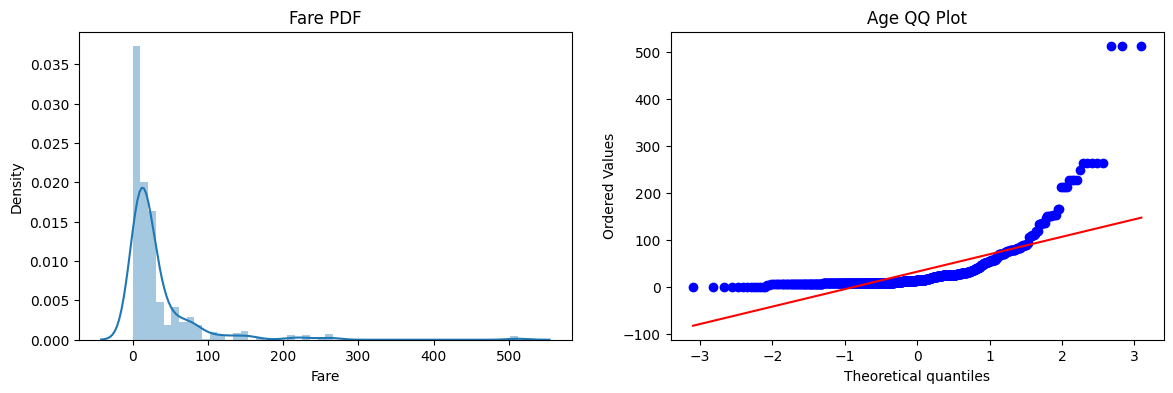

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [11]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [12]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6871508379888268


In [13]:
trf = FunctionTransformer(func=np.log1p)

In [14]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [15]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6703910614525139


In [16]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed, y, scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed, y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6622347066167291


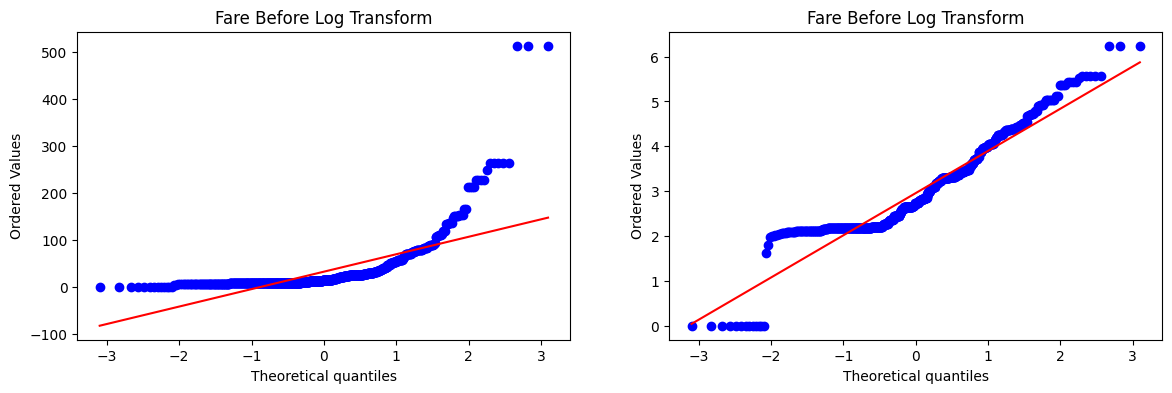

In [17]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log Transform')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log Transform')

plt.show()

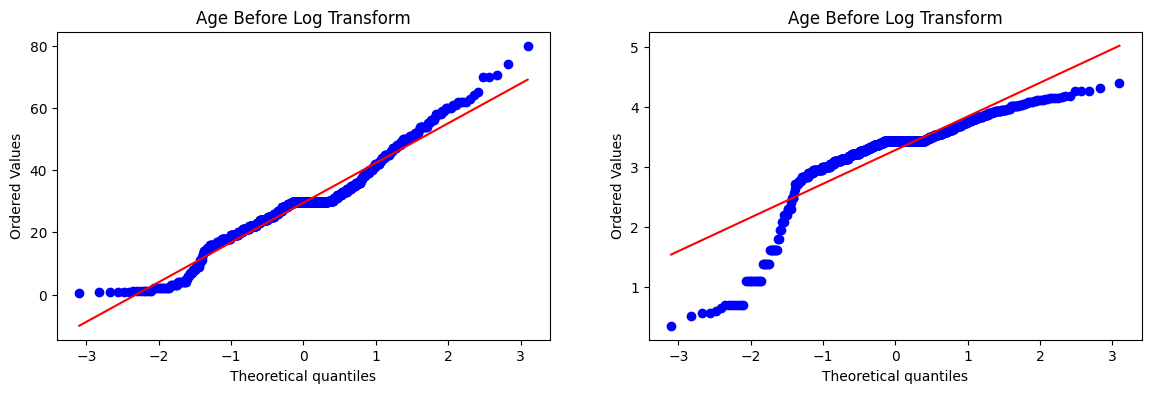

In [18]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log Transform')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age Before Log Transform')

plt.show()

In [19]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [20]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred1 = clf2.predict(X_test_transformed2)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849


In [21]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed, y, scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed, y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6566292134831462


In [24]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder='passthrough' )

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy", np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    



Accuracy 0.61729088639201


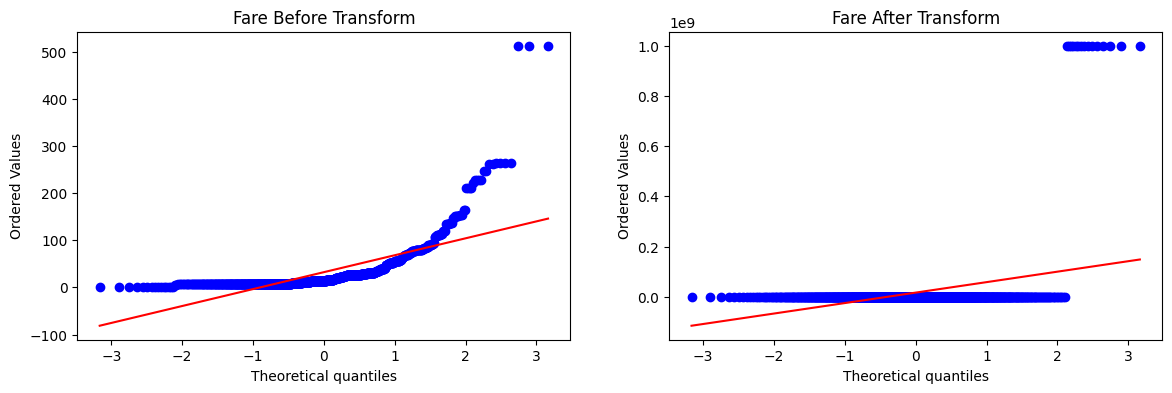

In [31]:
apply_transform(lambda x:1/(x+0.000000001))